<a href="https://colab.research.google.com/github/zw2788/MECE4520_project/blob/main/Method_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Library
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

from tqdm import tqdm

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [ ]:
## Read data
data = pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/Laptop_Intel1012.csv")
#data.head()

In [ ]:
## Data processing
def norm(data_in):
  range_in = np.max(data_in) - np.min(data_in)
  return (data_in - np.min(data_in))/range_in 

data["CPU_benchmark"] = norm(data["CPU_benchmark"]);
data["GPU_benchmark"] = norm(data["GPU_benchmark"]);
data["Memory_benchmark"] = norm(data["Memory_benchmark"]);
data["Ram_benchmark"] = norm(data["Ram_benchmark"]);
data["Weight_benchmark"] = norm(data["Weight_benchmark"]);
data.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_benchmark,Ram,Ram_benchmark,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Weight_benchmark,Price_euros
0,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,0.214014,12GB,0.133333,1TB HDD,0.179118,Intel HD Graphics 520,0.054920,Windows 10,2.3kg,0.401496,418.64
1,898,Asus,Rog GL753VD-GC082T,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,0.536748,12GB,0.133333,128GB SSD + 1TB HDD,0.320845,AMD Radeon R5 M430,0.045767,Windows 10,1.90kg,0.301746,817.95
2,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,0.690784,12GB,0.133333,1TB HDD,0.179118,Intel HD Graphics 520,0.054920,Windows 10,1.86kg,0.291771,469.00
3,399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,0.690784,12GB,0.133333,1TB HDD,0.179118,Intel HD Graphics 520,0.054920,Windows 10,1.2kg,0.127182,1535.00
4,476,Lenovo,Thinkpad T460s,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,0.228675,12GB,0.133333,256GB SSD,0.052243,Intel HD Graphics 6000,0.064073,macOS,1.34kg,0.162095,898.94


In [ ]:
## Data extraction
Y = data["Price_euros"].values
X = data["GPU_benchmark"].values

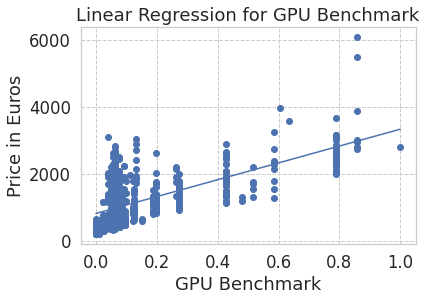

In [ ]:
## Polynomial regression
mymodel = np.poly1d(np.polyfit(X, Y, 1))
myline = np.linspace(0, 1, 10000)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.title("Linear Regression for GPU Benchmark")
plt.xlabel("GPU Benchmark")
plt.ylabel("Price in Euros")
plt.show()


In [ ]:
## R2 for single input
mymodel = np.poly1d(np.polyfit(X, Y, 1))
print(r2_score(Y, mymodel(X)))


0.39375293449964077


In [ ]:
## Calculates coefficients
betas = np.linalg.inv(X.T @ X) @ X.T @ Y
Y_hat = X @ betas
residual = Y - Y_hat


In [ ]:
## statsmodels library
model_1 = smf.ols(formula='Price_euros ~ GPU_benchmark + CPU_benchmark + Ram_benchmark + Memory_benchmark + Weight_benchmark' , data=data)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.18e-147
Time:                        20:00:30   Log-Likelihood:                -7688.5
No. Observations:                1012   AIC:                         1.539e+04
Df Residuals:                    1006   BIC:                         1.542e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1121.7327     39.225  

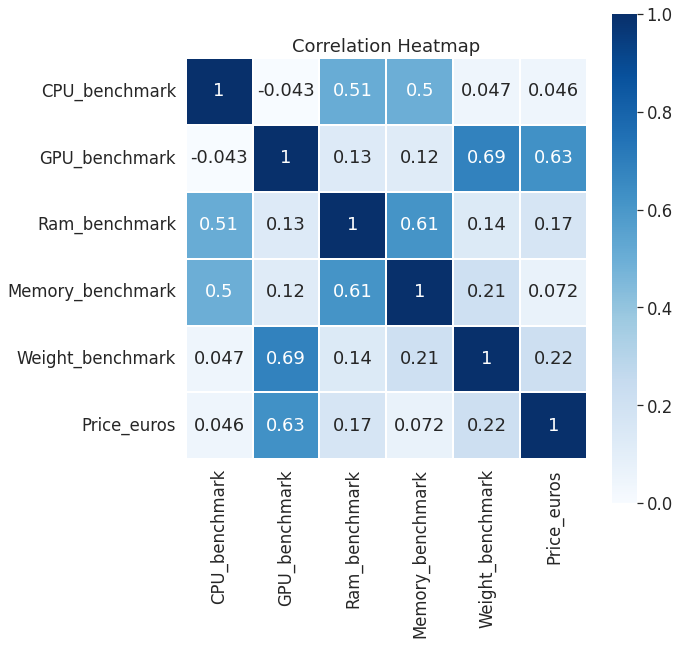

In [ ]:
## Heat map
X = data[["CPU_benchmark", "GPU_benchmark", "Ram_benchmark", "Memory_benchmark", "Weight_benchmark", "Price_euros"]].values
labels = ["CPU_benchmark", "GPU_benchmark", "Ram_benchmark", "Memory_benchmark", "Weight_benchmark", "Price_euros"]


df = pd.DataFrame(X)
corr = df.corr()

plt.subplots(figsize=(9,9))
ax1 = sns.heatmap(corr, cbar=1, linewidths=1, vmax=1, vmin=0, square=True, cmap='Blues',xticklabels=labels, yticklabels=labels, annot=True)
plt.title("Correlation Heatmap")
plt.show()